In [1]:
import pandas as pd

# Provide the correct file path to your CSV file
csv_file_path = r'C:\Users\ameyh\FORAGE INTERSHIP\T1\Submission\transactions.csv'

# Read the CSV file into a Pandas dataframe
transactions_df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe to verify the data has been loaded correctly
transactions_df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
column_names = transactions_df.columns.tolist()
print(column_names)


['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [5]:
k = 5  

# Using the head() function to get the first k rows
first_k_rows = transactions_df.head(k)

# Display the first k rows
print(first_k_rows)


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [7]:
import random

k = 5  
# Using the sample() function to get a random sample of k rows
random_sample = transactions_df.sample(n=k, random_state=random.seed())

# Display the random sample
print(random_sample)


        step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
170340    12  CASH_IN   40483.05  C1253182342    11280910.26     11321393.31   
10624      7  PAYMENT    4868.10   C638929408        9924.00         5055.90   
44863      9  CASH_IN  124140.37   C461260878     1957947.90      2082088.27   
95933     10  PAYMENT    7606.63   C995596987       47008.00        39401.37   
111445    11  PAYMENT   18800.95  C1220666074           0.00            0.00   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
170340  C2081946037       124199.22             0.0        0               0  
10624   M1687894945            0.00             0.0        0               0  
44863    C473344802        19916.44             0.0        0               0  
95933   M1887802641            0.00             0.0        0               0  
111445   M118346616            0.00             0.0        0               0  


In [8]:
unique_transaction_types = transactions_df['type'].unique().tolist()
print(unique_transaction_types)


['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']


In [9]:
top_destinations = transactions_df['nameDest'].value_counts().head(10)
print(top_destinations)


C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: nameDest, dtype: int64


In [10]:
fraudulent_transactions = transactions_df[transactions_df['isFraud'] == 1]
print(fraudulent_transactions)


        step      type      amount     nameOrig  oldbalanceOrg  \
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
251        1  TRANSFER     2806.00  C1420196421        2806.00   
252        1  CASH_OUT     2806.00  C2101527076        2806.00   
680        1  TRANSFER    20128.00   C137533655       20128.00   
...      ...       ...         ...          ...            ...   
182862    13  CASH_OUT      408.00  C1894004688         408.00   
193765    13  TRANSFER    48375.02   C920803432       48375.02   
193766    13  CASH_OUT    48375.02  C1894578299       48375.02   
196775    13  TRANSFER  4022667.54   C735463888     4022667.54   
196776    13  CASH_OUT  4022667.54    C79951219     4022667.54   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                  0.0   C553264065            0.00            0.00        1   
3                  0.0    C38997010        2118

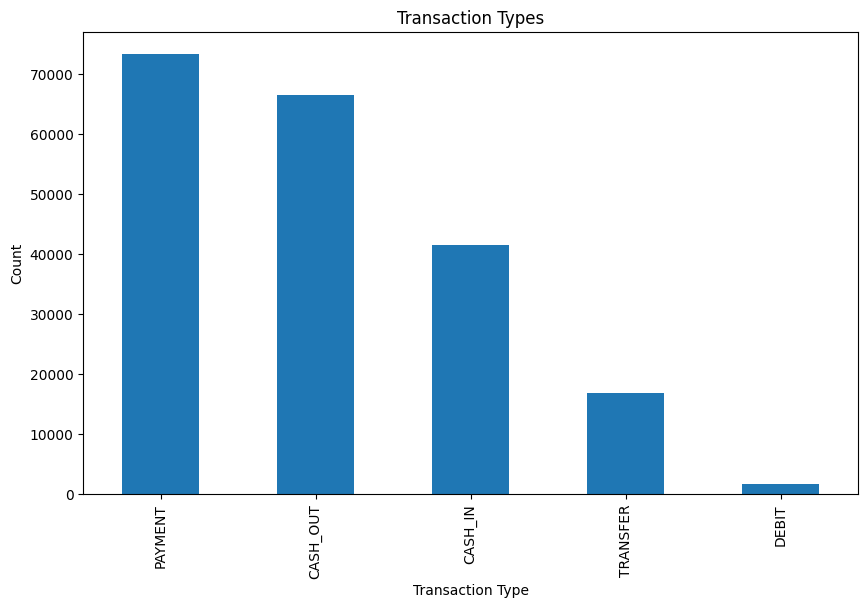

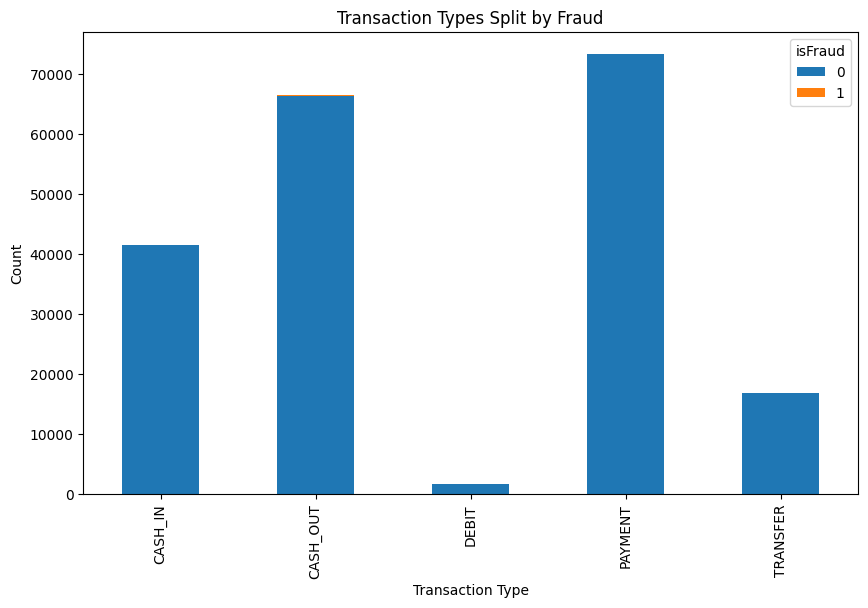

In [11]:
import matplotlib.pyplot as plt

# Transaction types bar chart
transaction_type_counts = transactions_df['type'].value_counts()
plt.figure(figsize=(10, 6))
transaction_type_counts.plot(kind='bar')
plt.title('Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Transaction types split by fraud bar chart
fraud_by_type = transactions_df.groupby(['type', 'isFraud']).size().unstack()
fraud_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Transaction Types Split by Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.show()


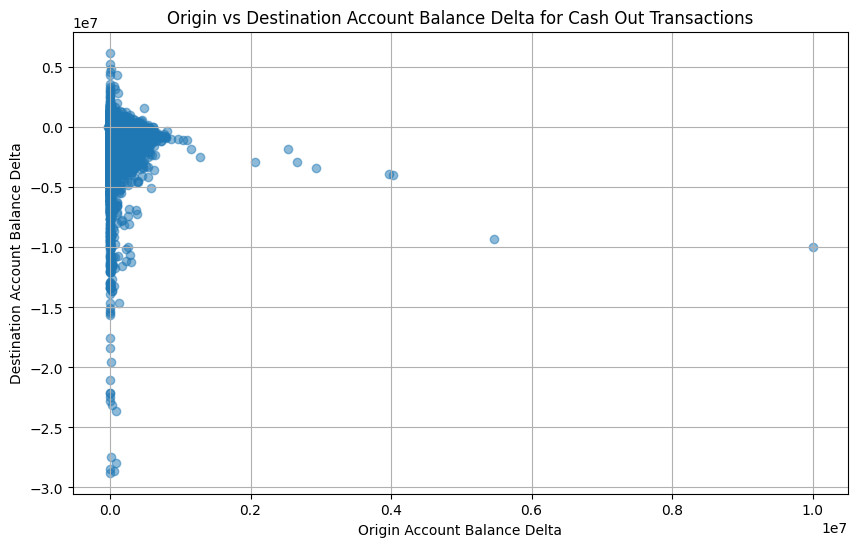

In [12]:
import matplotlib.pyplot as plt

# Filter transactions for Cash Out type
cash_out_transactions = transactions_df[transactions_df['type'] == 'CASH_OUT']

# Calculate account balance deltas
origin_balance_delta = cash_out_transactions['oldbalanceOrg'] - cash_out_transactions['newbalanceOrig']
destination_balance_delta = cash_out_transactions['oldbalanceDest'] - cash_out_transactions['newbalanceDest']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(origin_balance_delta, destination_balance_delta, alpha=0.5)
plt.title('Origin vs Destination Account Balance Delta for Cash Out Transactions')
plt.xlabel('Origin Account Balance Delta')
plt.ylabel('Destination Account Balance Delta')
plt.grid(True)
plt.show()
